# <font color='red'>Lab 02 - Standard Error</font>

### EARTH 468: Data Analysis & Model Estimation

#### Lab developed by E.A. Hetland

#### Due by the beginning of the lab period for the week of September 28th (2 weeks).

**For full credit:** 
Be sure to include your name with your notebook either as a markdown cell or in the file name. 

Write any necessary code in code cells below the description of each question. Write any discussion answers in markdown cells below the code cells, not as comments in your code. Be explicit about what you are answering and write in complete sentences. 

If you are asked to include a plot, make sure to label the axes and include a descriptive title.

To turn in this assignment, in the Jupyter toolbar select File/Download as/html or pdf. Make sure that all of your outputs are clear. Upload the downloaded file to the proper assignment submission page on Canvas. Please do not turn in a .ipynb file.

**Objective:** Explore the concept of standard error through artificial experiments in Python.

**Python Objective:** Gain familiarity with generating random numbers, writing 'for' loops, and some new plotting techniques.

**Note on Lab Topic:** We will use the Poisson probability mass function in this lab (alternatively the Poisson
probability density function, but we use “mass” just to signify that the random variate is discrete). The Poisson PMF is described in the course reader in section 3:7.2.

In [1]:
import numpy as np
number_longway = np.array([0,1,2,3,4,5,6,7,8,9])
numbers = np.arange(0,10,1) # numbers 0 to 10 (not including 10), stepping by 1
print(number_longway,numbers)

[1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


In [2]:
for i in numbers:
    print(i)

0
1
2
3
4
5
6
7
8
9


In [3]:
for i in numbers:
    print(i**2)

0
1
4
9
16
25
36
49
64
81


In [4]:
words = ['cat','dog','horse']
for i in words:
    print(i)

cat
dog
horse


In [5]:
for i in words:
    print('hello') # will print hello same number of times as words in our list

hello
hello
hello


# <font color='orange'>Excercise - 40 pts</font>

Scientists from the University of Michigan Yeti Activity Center (UM-YAC) are preparing to travel to the Sakteng
Yeti reserve located in the Kingdom of Bhutan, in order to collect a tissue sample from a Yeti. (We will deal
with catching the Yeti in later labs.)

One of the primary questions that the UM-YAC PI is interested in, is how often Yeti skin cells divide per hour.
Human skin cells divide roughly every 0.5–1.5 hours, and there is good reason to believe that cell division in Yeti
skin is an order of magnitude slower. Indeed, the UM-YAC PI has conducted ground breaking theoretical research
on anatomy and physiology of cryptids. The UM-YAC PI has concluded that Yeti skin cells divide on average 3.4
times per day and that cell division is a Poisson process, i.e., cell division follows a Poisson probability mass
function (PMF). If the slow division of Yeti skin cells is confirmed, there are potential applications to slowing cell
division in human skin. This expedition is being funded by the Council for Research and Application of Plastic
Surgery located in Palm Springs, CA.

The UM-YAC PI has assigned to you to conduct a preliminary study to assess the success of the upcoming
expedition. Specifically, the UM-YAC PI wants you to investigate how accurate the result will be from 200 viable
skin cells, compared to the theoretical expectation of 3.4 divisions per day.

## <font color='red'>Import Libraries:</font>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

## <font color='red'>a) 4 pts</font>

The Poisson PMF is

<font size='3'>$f(k)=\left(\frac{e^{-\lambda}}{k!}\right)\lambda^k$</font>

where $k$ is the random variate, and $\lambda$ is the expectation, which is to say $E(k)=\lambda$. Write a Python function to solve the Poisson PMF for any $k$ and any $\lambda$ (*i.e.* $k$ and $\lambda$ will be the parameters for the function you will write). Use your function of the Poisson PMF over an appropriate range of $k$ values for $\lambda$ = 0.5, 2.5, and 10. Plot all results on one plot with a legend; include both the exact points and a line connecting them on the graph, using the following code as an example:

```python
ax.plot(ks,poisson_values,label='descriptive label here',marker='o')
```
Don't forget you need to set up your figure and axes objects before you can plot!

In [11]:
def poisson_pmf(k,lamda):
    first_part = np.exp(-lamda)/(sp.factorial(k))
    second_part = lamda**k
    output = first_part*second_part
    return output

ks = np.arange(0,20)

p_pmf_half = poisson_pmf(ks,0.5)
p_pmf_twohalf = poisson_pmf(ks,2.5)
p_pmf_ten = poisson_pmf(ks,10)


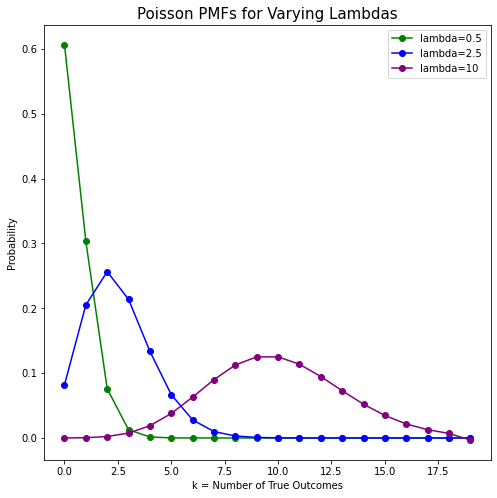

In [12]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)

ax.plot(ks,p_pmf_half,label='lambda=0.5',marker='o',color='green')
ax.plot(ks,p_pmf_twohalf,label='lambda=2.5',marker='o',color='blue')
ax.plot(ks,p_pmf_ten,label='lambda=10',marker='o',color='purple')

ax.set_xlabel('k = Number of True Outcomes',size=10)
ax.set_ylabel('Probability',size=10)
ax.set_title('Poisson PMFs for Varying Lambdas',size=15)

plt.legend()
plt.show()

## <font color='red'>b) 4 pts</font>

Generate 200 random numbers using **NumPy**’s Poisson random number generator function *np.random.poisson* and the theoretical expectation of 3.4. Consider that each of the random numbers correspond to the number of observed divisions per day of one cell.

Use **Matplotlib** to produce a histogram of the distribution of random numbers you just created.

Text(0.5, 1.0, 'poisson(lambda=3.4)')

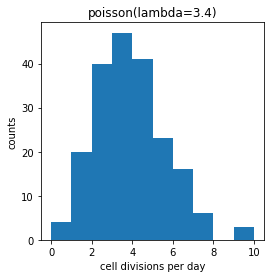

In [16]:
#?np.random.poisson
obs = np.random.poisson(3.4,200)

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)

ax.hist(obs)
ax.set_xlabel('cell divisions per day')
ax.set_ylabel('counts')
ax.set_title('poisson(lambda=3.4)')

## <font color='red'>c) 6 pts</font>

Calculate the mean, sample standard deviation, and standard error of the sample distribution you computed in part (b). Compare to the expected cell divisions per day estimated by the UM-YAC PI. To calculate the standard error, use the *sem* function imported as below (you will actually have to copy this line of code into your coding cell, because here it is just an example):

```python
from scipy.stats import sem
```

In [17]:
from scipy.stats import sem

In [21]:
# ?np.var for homework question

print('The mean is ',np.mean(obs))
print('The standard deviation is ',np.std(obs,ddof=1)) # unbiased sample standard deviation
print('The standard error is ',sem(obs,ddof=1)) # unbiased standard error of the mean

The mean is  3.43
The standard deviation is  1.7551360381927135
The standard error is  0.1241068594510959


The expected cell divisions per day estimated by the UM-YAC PI is 3.4. Given the mean shown above (and the standard deviation and standard error), this is a very close estimate.

## <font color='red'>d) 6 pts</font>

Repeat the experiment 6 times (i.e., repeat parts (b) and
(c) 6 times). We will assume each of the 6 iterations corresponds to 6 hypothetical collections of 200 cells from a Yeti, which we will refer to as a “realization” for brevity. Use a python loop to calculate the mean, standard error, and standard deviation of each dataset (you will need the standard deviation for part (e)). Graphically compare the outcomes of the 6 realizations. Do this by plotting the mean of each dataset, plus or minus the standard error, using the **Matplotlib** function *errorbar*. Also plot the theoretical expected result of 3.4 on the same plot using a different color horizontal line. Make the y-axis go from 1 to 5.

The final plot should look something like this:

<img src="ComparingStandardErrors.png">

In [25]:
means = [] # empty list
std_devs = []
std_errors = []

for i in np.arange(0,6):
    obs = np.random.poisson(3.4,200)
    mean = np.mean(obs)
    std_dev = np.std(obs,ddof=1)
    std_error = sem(obs,ddof=1)
    means.append(mean)
    std_devs.append(std_dev)
    std_errors.append(std_error)
    
print(means) 
print(std_devs)
print(std_errors)

[3.2, 3.5, 3.46, 3.215, 3.41, 3.41]
[1.6071448512390916, 1.8755233775398517, 1.986992879584018, 1.9175924499277994, 1.8679793183192213, 1.8973401111786565]
[0.11364230226602068, 0.13261952985323264, 0.1405016139323244, 0.1355942624896072, 0.13208608430997457, 0.1341622058831666]


Text(0, 0.5, 'Observation')

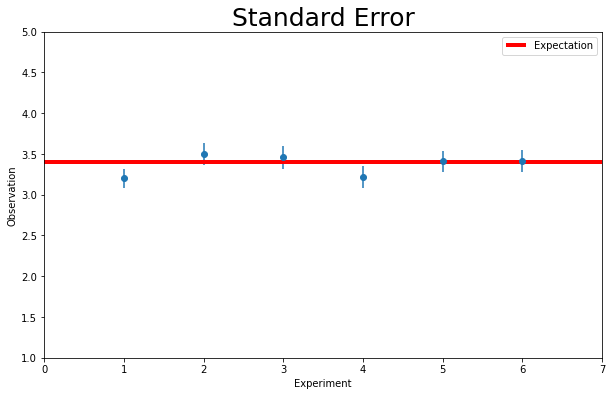

In [27]:
fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)

x = np.arange(1,7) # for the 6 experiments
ax.errorbar(x,means,yerr=std_errors,linestyle='None',marker='o')

ax.hlines(3.4,0,7,color='red',linewidth=4,label='Expectation')
plt.legend()

ax.set_xlim(0,7)
ax.set_ylim(1,5)

ax.set_title('Standard Error',size=25)
ax.set_xlabel('Experiment')
ax.set_ylabel('Observation')

## <font color='red'>e) 6 pts</font>

Compare the mean and sample standard deviations of the 6 realizations in part (d) to the theoretical expectation of
3.4 divisions per day. In other words, make a similar plot to as in part (d) but use the sample standard deviations
for the error bars instead of the standard error. Based on this plot and in part (d), do you think that representing error of the mean using the sample standard deviation or the standard error is more robust?

Text(0, 0.5, 'Observation')

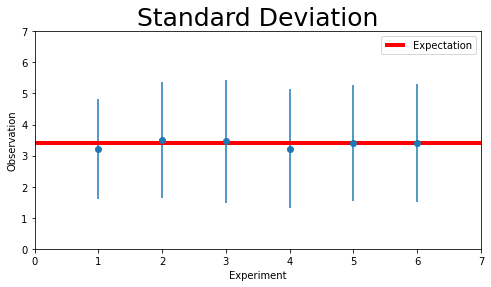

In [32]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)

x = np.arange(1,7) # for the 6 experiments
ax.errorbar(x,means,yerr=std_devs,linestyle='None',marker='o')

ax.hlines(3.4,0,7,color='red',linewidth=4,label='Expectation')
plt.legend()

ax.set_xlim(0,7)
ax.set_ylim(0,7)

ax.set_title('Standard Deviation',size=25)
ax.set_xlabel('Experiment')
ax.set_ylabel('Observation')

Based on this plot and in part (d), I think that representing the error of the mean using the sample standard error is more robust (appropriate) because the error bars are telling us the uncertainty of the mean. The standard deviation tells us about the spread of the data points distribution in the mean, while standard error tells us how well we truly know the mean. The standard deviation error bars are also way too large.

## <font color='red'>f) 8 pts</font>

Test the sensitivity of the mean to the particular set of random numbers by repeating the experiment a much larger number of times. Compute the mean and standard error for each realization, and plot a histogram of the mean outcome of number of divisions per day of the 200 cells. Consider 100, 1000, and 10000 realizations.

As you increase the number of realizations, remark on the features of the histogram for large number of realization.
You might want to run the script a few times for each set of realizations. **Turn in the histogram of 10000 realizations.**

Text(0.5, 1.0, 'Mean Outcome of Number of Divisions per Day of the 200 Cells')

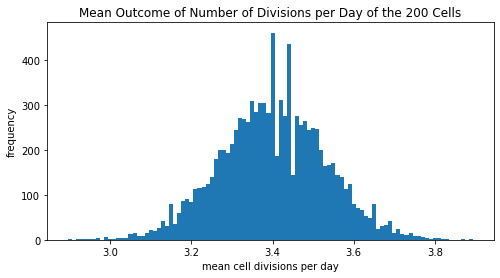

In [55]:
means = [] 
std_devs = []
std_errors = []

for i in np.arange(0,10000):
    obs = np.random.poisson(3.4,200)
    mean = np.mean(obs)
    std_dev = np.std(obs,ddof=1)
    std_error = sem(obs,ddof=1)
    means.append(mean)
    std_devs.append(std_dev)
    std_errors.append(std_error)

fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)

ax.hist(means,bins=100)
ax.set_xlabel('mean cell divisions per day')
ax.set_ylabel('frequency')
ax.set_title('Mean Outcome of Number of Divisions per Day of the 200 Cells')

Histogram becomes much more refined with more and more realizations.

## <font color='red'>g) 8 pts</font>

Compare the mean and standard deviation of result of the 10000 realizations in part (f) to the mean and standard
error found in part (c). In light of the comparison, remark on what the standard error found in part (c) represents.

In [65]:
np.mean(means),np.std(means,ddof=1) # mean and standard deviation of result of the 10000 realizations

(3.4007730000000005, 0.12985753258427826)

The mean and standard deviation of the result of the 10000 realizations is above. The mean and standard error from part (c) is 3.43 and 0.1241068594510959, respectively. In light of this comparison, the standard error in part (c) actually represents the standard deviation of the 10000 realizations. Standard error is the uncertainty on the mean and standard deviation is how far your data points are from the mean. So, the standard deviation of the distribution of means will be the same as the original standard error. 